# 1. Comparing multi-class classifiers for handwritten digits classifi- cation.

In [1]:
import scipy.io
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:
# Load MNIST dataset from the .mat file
mat = scipy.io.loadmat('data/mnist_10digits.mat')

# using the correct keys
X_train = mat['xtrain']
y_train = mat['ytrain'].ravel()
X_test = mat['xtest']
y_test = mat['ytest'].ravel()

# Standardize
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train.shape, y_train.shape, X_test.shape, y_test.shape


((60000, 784), (60000,), (10000, 784), (10000,))

In [3]:
# Helper function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    return cm, precision, recall, f1


In [4]:
# KNN
knn = KNeighborsClassifier(n_neighbors=3) 
knn.fit(X_train, y_train)
knn_cm, knn_precision, knn_recall, knn_f1 = evaluate_model(knn, X_test, y_test)

In [5]:
# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
log_reg_cm, log_reg_precision, log_reg_recall, log_reg_f1 = evaluate_model(log_reg, X_test, y_test)

In [6]:
# Linear SVM
linear_svm = LinearSVC(max_iter=10000)
linear_svm.fit(X_train, y_train)
linear_svm_cm, linear_svm_precision, linear_svm_recall, linear_svm_f1 = evaluate_model(linear_svm, X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [7]:
# Kernel SVM
kernel_svm = SVC(kernel='rbf', gamma='scale')
kernel_svm.fit(X_train, y_train)
kernel_svm_cm, kernel_svm_precision, kernel_svm_recall, kernel_svm_f1 = evaluate_model(kernel_svm, X_test, y_test)

In [8]:
# Neural Network
mlp = MLPClassifier(hidden_layer_sizes=(20, 10), max_iter=1000)
mlp.fit(X_train, y_train)
mlp_cm, mlp_precision, mlp_recall, mlp_f1 = evaluate_model(mlp, X_test, y_test)

In [9]:
results = pd.DataFrame({
    'Classifier': ['KNN', 'Logistic Regression', 'Linear SVM', 'Kernel SVM', 'Neural Network'],
    'Precision': [knn_precision, log_reg_precision, linear_svm_precision, kernel_svm_precision, mlp_precision],
    'Recall': [knn_recall, log_reg_recall, linear_svm_recall, kernel_svm_recall, mlp_recall],
    'F1 Score': [knn_f1, log_reg_f1, linear_svm_f1, kernel_svm_f1, mlp_f1]
})

results

,Classifier,Precision,Recall,F1 Score
0,KNN,0.970688,0.9705,0.970452
1,Logistic Regression,0.925423,0.9256,0.925445
2,Linear SVM,0.918006,0.9183,0.918014
3,Kernel SVM,0.979201,0.9792,0.979186
4,Neural Network,0.948481,0.9484,0.948360


# 4. Feature selection and change-point detection.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [12]:
# Joint 
p_spam_prize = np.array([[150, 10], [1000, 15000]]) / 16160

# Marginal 
p_spam = np.array([160, 16000]) / 16160
p_prize = np.array([1150, 15010]) / 16160

# Mutual Information
mutual_info_prize = np.sum(p_spam_prize * np.log(p_spam_prize / (p_spam[:, None] * p_prize)))

mutual_info_prize


0.022846213392155645

In [13]:
# Joint 
p_spam_hello = np.array([[145, 15], [11000, 5000]]) / 16160

# Marginal 
p_spam = np.array([160, 16000]) / 16160
p_hello = np.array([11145, 5015]) / 16160

# Mutual Information
mutual_info_hello = np.sum(p_spam_hello * np.log(p_spam_hello / (p_spam[:, None] * p_hello)))

mutual_info_hello


0.0013502788694245414

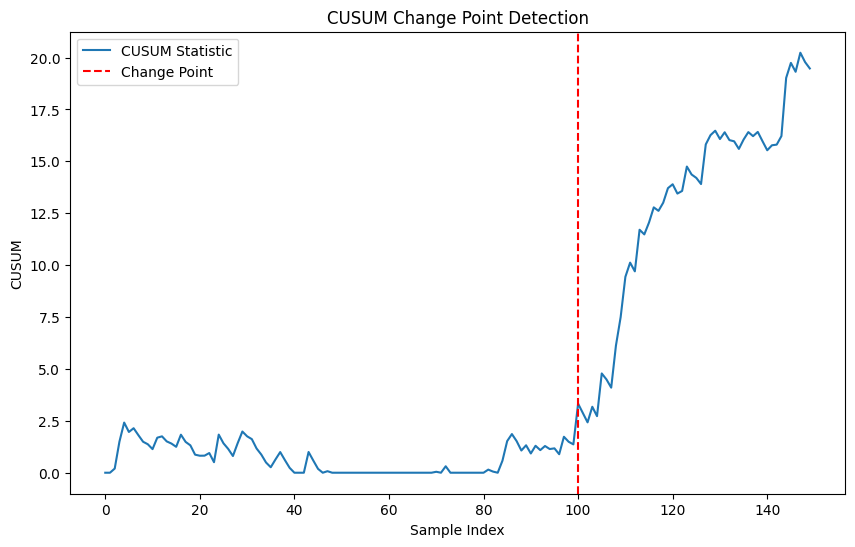

In [14]:
# Parameters
n0 = 100
n1 = 50

# Generate samples
np.random.seed(0)  
x0 = np.random.normal(0, 1, n0)
x1 = np.random.normal(0.5, np.sqrt(1.5), n1)
x = np.concatenate([x0, x1])

# Log-likelihood ratio
f0 = norm(0, 1).pdf(x)
f1 = norm(0.5, np.sqrt(1.5)).pdf(x)
llr = np.log(f1 / f0)

# CUSUM statistic
cusum = np.zeros(len(x))
for i in range(1, len(x)):
    cusum[i] = max(0, cusum[i-1] + llr[i])

# Plot the CUSUM statistic
plt.figure(figsize=(10, 6))
plt.plot(cusum, label='CUSUM Statistic')
plt.axvline(x=n0, color='r', linestyle='--', label='Change Point')
plt.xlabel('Sample Index')
plt.ylabel('CUSUM')
plt.legend()
plt.title('CUSUM Change Point Detection')
plt.show()


# 5. Medical imaging reconstruction

In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import RidgeCV, LassoCV


# Load the .mat file
data = scipy.io.loadmat('data/cs.mat')
# List all keys in the .mat file
print("Keys in the .mat file:", data.keys())

Keys in the .mat file: dict_keys(['__header__', '__version__', '__globals__', 'img'])


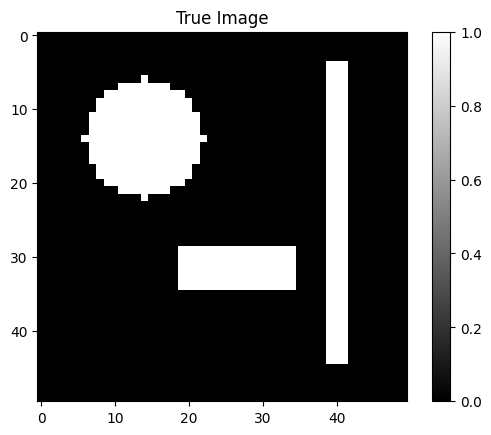

In [2]:
true_image = data['img']

# Display image
plt.imshow(true_image, cmap='gray')
plt.title('True Image')
plt.colorbar()
plt.show()

# Vectorize the true image
x_true = true_image.flatten()


In [3]:
# Parameters
n, p = 1300, 2500
A = np.random.randn(n, p)
epsilon = np.random.normal(0, np.sqrt(25), n)

# Generate y
y = A @ x_true + epsilon

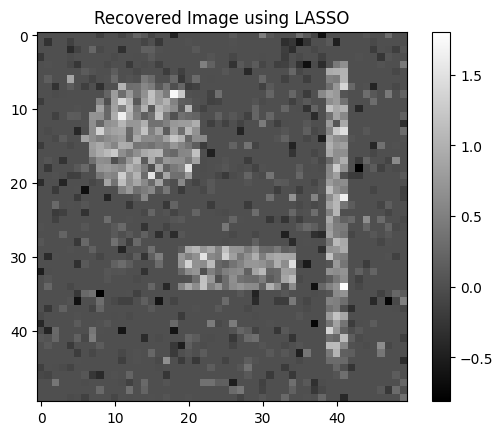

In [4]:
# Perform LASSO with 10-fold cross-validation
lasso = LassoCV(cv=10, random_state=0).fit(A, y)

# Recover the image
x_lasso = lasso.coef_
recovered_image_lasso = x_lasso.reshape(true_image.shape)

# Plot 
plt.imshow(recovered_image_lasso, cmap='gray')
plt.title('Recovered Image using LASSO')
plt.colorbar()
plt.show()


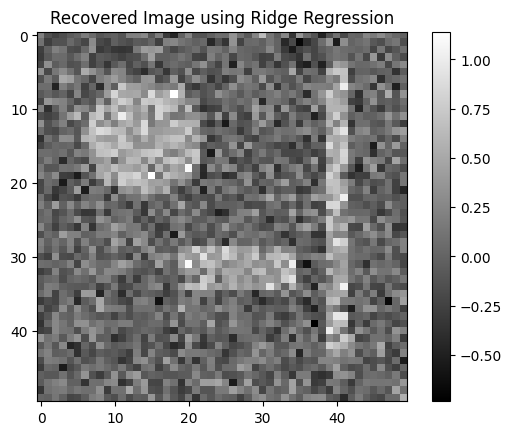

In [5]:
# Perform Ridge regression with 10-fold cross-validation
ridge = RidgeCV(alphas=np.logspace(-6, 6, 13), cv=10).fit(A, y)

# Recover the image
x_ridge = ridge.coef_
recovered_image_ridge = x_ridge.reshape(true_image.shape)

# Plot
plt.imshow(recovered_image_ridge, cmap='gray')
plt.title('Recovered Image using Ridge Regression')
plt.colorbar()
plt.show()


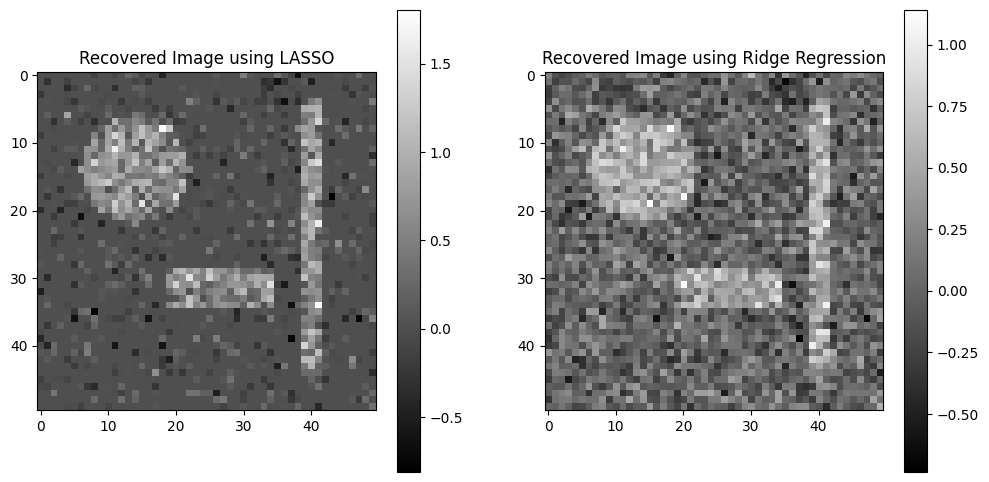

In [6]:
# Plot both to compare
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(recovered_image_lasso, cmap='gray')
plt.title('Recovered Image using LASSO')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(recovered_image_ridge, cmap='gray')
plt.title('Recovered Image using Ridge Regression')
plt.colorbar()

plt.show()
